<a href="https://colab.research.google.com/github/Testgitchhub/Upskill_Campus_project/blob/main/Forecasting_of_smart_city_traffic_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#simply importing the pandas,numpy and matplotlib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#creating the user defined function for finding unique time in the given data set
def uniqueTime(df):
    # creating list for unique time
    unixtime = []
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    df['DateTime'] = unixtime #storing in the under DateTime column
    return(df)


In [5]:
#importing the datetime and sklearn modules,since we are working with decisionTreeclassifier
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [6]:
#reading the datasets from drive and assinging them to train and test modules
train_module = pd.read_csv('/content/train_aWnotuB.csv',encoding='ISO-8859-1',engine='c')
test_module = pd.read_csv('/content/test_BdBKkAj.csv',encoding='ISO-8859-1',engine='c')
test_module.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [7]:
train_module['DateTime'] = pd.to_datetime(train_module['DateTime'])
test_module['DateTime'] = pd.to_datetime(test_module['DateTime'])
test_module.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


In [8]:
test_module['Weekday'] = [datetime.weekday(date) for date in test_module.DateTime]
test_module['Year'] = [date.year for date in test_module.DateTime]
test_module['Month'] = [date.month for date in test_module.DateTime]
test_module['Day'] = [date.day for date in test_module.DateTime]
test_module['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in test_module.DateTime]
test_module['Week'] = [date.week for date in test_module.DateTime]
test_module['Quarter'] = [date.quarter for date in test_module.DateTime]
# Creating features from DateTime for test data
train_module['Weekday'] = [datetime.weekday(date) for date in train_module.DateTime]
train_module['Year'] = [date.year for date in train_module.DateTime]
train_module['Month'] = [date.month for date in train_module.DateTime]
train_module['Day'] = [date.day for date in train_module.DateTime]
train_module['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in train_module.DateTime]
train_module['Week'] = [date.week for date in train_module.DateTime]
train_module['Quarter'] = [date.quarter for date in train_module.DateTime]


Feature ranking:
feature 0 : DateTime (0.372739)
feature 7 : Time (0.356963)
feature 6 : Day (0.066069)
feature 3 : Weekday (0.060910)
feature 2 : ID (0.052235)
feature 1 : Junction (0.049219)
feature 8 : Week (0.030397)
feature 5 : Month (0.007593)
feature 9 : Quarter (0.002183)
feature 4 : Year (0.001692)


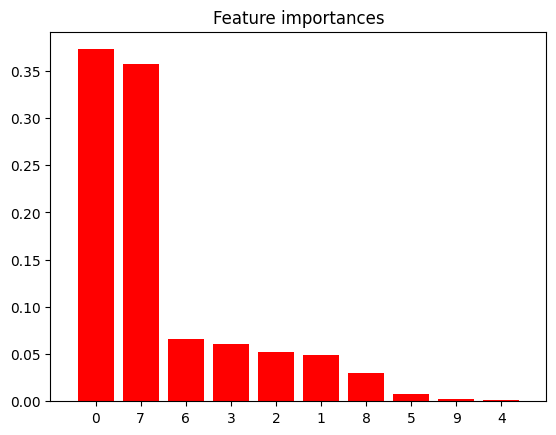

In [9]:
# create an instance for tree feature selection
tree_clf = ExtraTreesClassifier()
# first create arrays holding input and output data
DateTime_attributes = train_module.drop(['Vehicles'],axis=1)
# Converting timestamp to seconds
DateTime_attributes = uniqueTime(DateTime_attributes)
# store features in X array and y array
X = DateTime_attributes.values
y = train_module['Vehicles'].values
# fit the model
tree_clf.fit(X, y)
importances = tree_clf.feature_importances_
feature_names = DateTime_attributes.columns.tolist()
feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))
# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

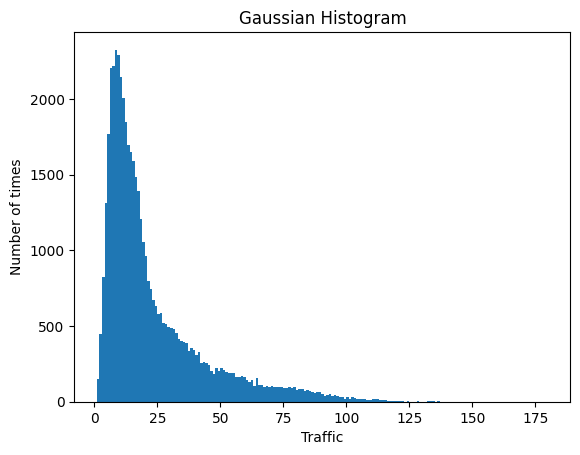

In [10]:
data = train_module.Vehicles
binwidth = 1
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Traffic")
plt.ylabel("Number of times")
plt.show()


In [11]:
# Convert timestamp to seconds
test_module_features = uniqueTime(test_module.drop(['Year','Quarter','Month','ID'],axis=1))
# Create X_test from the test set
X_test = test_module_features.values
## Dropping Features from train set #
DateTime_attributes = train_module.drop(['Vehicles','Year', 'Quarter', 'Month', 'ID'], axis=1)
DateTime_attributes = uniqueTime(DateTime_attributes)
# store features in X array
X = DateTime_attributes.values
y = train_module['Vehicles'].values

In [12]:
# Data prep
df_solution = pd.DataFrame()
df_solution['ID'] = test_module.ID
# Starting time for time calculations
start_time = time.time()
# Create decision tree object
clf = DecisionTreeClassifier(criterion='gini', random_state = 13)
# fit the model
clf.fit(X, y)
# predict the outcome for testing data
predictions = clf.predict(X_test)
print("The time taken to execute is %s seconds" % (time.time() - start_time))
# Prepare Solution dataframe
df_solution['Vehicles'] = predictions
df_solution

The time taken to execute is 0.9954288005828857 seconds


,ID,Vehicles
0,20170701001,70
1,20170701011,62
2,20170701021,52
3,20170701031,39
4,20170701041,40
...,...,...
11803,20171031194,30
11804,20171031204,30
11805,20171031214,16
11806,20171031224,22
